#VRP PROBLEM

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of nodes, with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

The formulation is the following :
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1 && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij} = 1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [1]:
# entrée du nombre de client et de la capacité du véhicule
nb_client = int(input('Entrez le nombre de clients: '))
nb_capacity = int(input('Saisir la capacité d\'un véhicule: '))

Entrez le nombre de clients: 12
Saisir la capacité d'un véhicule: 15


In [2]:
# on importe le paquet numpy en tant que np
import numpy as np

In [3]:
# rnd est un objet qui génère des nombres aléatoires
rnd = np.random
# seed (0) est une méthode qui réinitialise à chaque fois le même ensemble aléatoire de nombres (rnd)
rnd.seed(0)

In [4]:
# nombre de clients
n = nb_client
# Capacité maximale du véhicule
Q = nb_capacity
# tous les noeuds = les clients sans le dépôt
N = [i for i in range(1,n+1)]
# tous les noeuds avec le dépôt
V = [0] + N
# collection qui contient ce que chaque client (noeud) demande
q = {i:rnd.randint(1,10) for i in N}

In [5]:
# génération de nombres aléatoires entre (0 et 15) * 200
loc_x = rnd.rand(len(V))*200
# génération de nombres aléatoires entre (0 et 15) * 100
loc_y = rnd.rand(len(V))*100

In [6]:
# on importe le package matplot.pyplot en tant que plt
import matplotlib.pyplot as plt

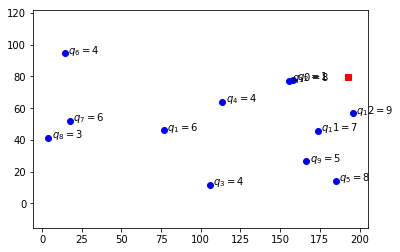

In [7]:
# on trace les n noeuds (clients) et on choisie que chaque noeud soit bleu 
plt.scatter(loc_x[1:],loc_y[1:],c='b')
# on associe et on écrit la demande de chaque client à droite du noeud
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2, loc_y[i]))
# le noeud 0 (dépôt) est représenté par un carré rouge
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');

In [8]:
# Initialisation de l'ensemble des arcs A
A = [(i,j) for i in V for j in V if i!=j]
c = {(i, j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [9]:
# on importe le docplex.mp.model à partir du CPLEX en tant que Model
from docplex.mp.model import Model

In [10]:
mdl = Model('CVRP')

In [11]:
# Initialisation de la variable binaire x_i, j
x = mdl.binary_var_dict(A,name='x')
#Initialisation de la demande cumulative u
u = mdl.continuous_var_dict(N,ub=Q,name='u')

In [12]:
# Initialisation de la fonction objectif (minimiser le total des coûts)
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
# Initialisation de la première contrainte (s'il y a un client, il faut y aller qu'une seule fois)
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
# Initialisation de la deuxième contrainte (si j'atteint un client, je devrai venir d'un autre client)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
# Initialisation de la troisième contrainte (si on va d'un noeud ou client i à j, la demande cumulative u de j doit être égale à la 
# la demande cumulative de i + la quantité de marchandise demandé par j), autrement dit on vérifie qu'on peut toujours 
# livrer le prochain client)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
#Initialisation de la quatrième contrainte (la demande cumulative ne doit jamais être supérieur à la capacité d'un camion)
mdl.add_constraints(u[i]>=q[i] for i in N)
# limiteur de temps au cas où la méthode dure trop longtemps
# mdl.parameters.timelimit = 15
# on obtient la solution
file = "source.txt"
with open(file, 'w') as lout:
    solution = mdl.solve(trace_log=True, log_output=lout)

f = open(file, "a+")
f.write(str(nb_client))
f.write("\r")
f.write(str(nb_capacity))
f.close()

C:\Users\leons\Anaconda3\lib\site-packages\docplex\mp\model.py:3469: UserWarning: Unknown quick-setting in Context: trace_log, value: True
  context.update_key_value(argname, argval)


In [13]:
# Impression de la solution
print(solution)

solution for: CVRP
objective: 1012.37
x_0_3=1
x_0_6=1
x_0_9=1
x_0_10=1
x_0_12=1
x_1_4=1
x_2_0=1
x_3_1=1
x_4_0=1
x_5_0=1
x_6_8=1
x_7_2=1
x_8_7=1
x_9_5=1
x_10_11=1
x_11_0=1
x_12_0=1
u_1=11.000
u_2=15.000
u_3=5.000
u_4=15.000
u_5=15.000
u_6=5.000
u_7=14.000
u_8=8.000
u_9=7.000
u_10=8.000
u_11=15.000
u_12=9.000



In [14]:
# Indicateur de solution optimal ou non (2 = optimal, 1 = non-optimal)
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [15]:
# on identifie les arrêtes
active_arcs = [a for a in A if x[a].solution_value>0.9]

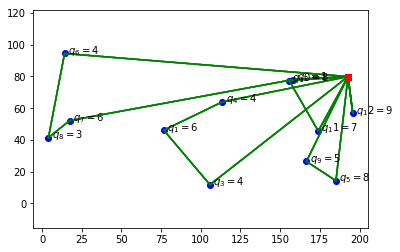

In [16]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2, loc_y[i]))
    for i,j in active_arcs:
        # on met en couleur les arrêtes actives
        plt.plot([loc_x[i], loc_x[j]],[loc_y[i],loc_y[j]],c='g',alpha=0.3)
    plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
    plt.axis('equal');